In [13]:
import pandas as pd
import numpy as np
from ggplot import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df_wine = pd.read_csv("/Users/Jessica/Desktop/winereviews/winemag-data-130k-v2.csv")

In [3]:
df_wine = df_wine.drop(["Unnamed: 0"], axis='columns')

In [4]:
df_wine = df_wine.dropna(subset = ['price','country','variety'])

In [16]:
df_wine.columns

Index(['-1', '223', '8', '2', '0', '-1.1', '0.1', '0.2', '0.3', '0.4',
       ...
       '-1.5', '0.94', '0.95', '0.96', '0.97', '0.98', '0.99', '0.100',
       '0.101', '0.102'],
      dtype='object', length=117)

In [6]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120915 entries, 1 to 129970
Data columns (total 13 columns):
country                  120915 non-null object
description              120915 non-null object
designation              86148 non-null object
points                   120915 non-null int64
price                    120915 non-null float64
province                 120915 non-null object
region_1                 101400 non-null object
region_2                 50292 non-null object
taster_name              96420 non-null object
taster_twitter_handle    91500 non-null object
title                    120915 non-null object
variety                  120915 non-null object
winery                   120915 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [7]:
df_wine.isnull().sum()

country                      0
description                  0
designation              34767
points                       0
price                        0
province                     0
region_1                 19515
region_2                 70623
taster_name              24495
taster_twitter_handle    29415
title                        0
variety                      0
winery                       0
dtype: int64

In [8]:
## ggplot using size, shape and color as well as facets.
### in reality, it's not user-friendly to see too many variables in one chart

In [9]:
df = df_wine[df_wine.variety.isin(df_wine.variety.value_counts().head(9).index)]
df = df[df.country.isin(df.country.value_counts().head(9).index)]
df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,US,"Slightly reduced, this wine offers a chalky, t...",NaN,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,@vboone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
14,US,Building on 150 years and six generations of w...,NaN,87,12.0,California,Central Coast,Central Coast,Matt Kettmann,@mattkettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou
15,Germany,Zesty orange peels and apple notes abound in t...,Devon,87,24.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Richard Böcking 2013 Devon Riesling (Mosel),Riesling,Richard Böcking
20,US,Ripe aromas of dark berries mingle with ample ...,Vin de Maison,87,23.0,Virginia,Virginia,NaN,Alexander Peartree,NaN,Quiévremont 2012 Vin de Maison Red (Virginia),Red Blend,Quiévremont
21,US,"A sleek mix of tart berry, stem and herb, alon...",NaN,87,20.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Acrobat 2013 Pinot Noir (Oregon),Pinot Noir,Acrobat
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
28,Italy,"Aromas suggest mature berry, scorched earth, a...",Mascaria Barricato,87,17.0,Sicily & Sardinia,Cerasuolo di Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2011 Mascaria Barricato (Cera...,Red Blend,Terre di Giurfo


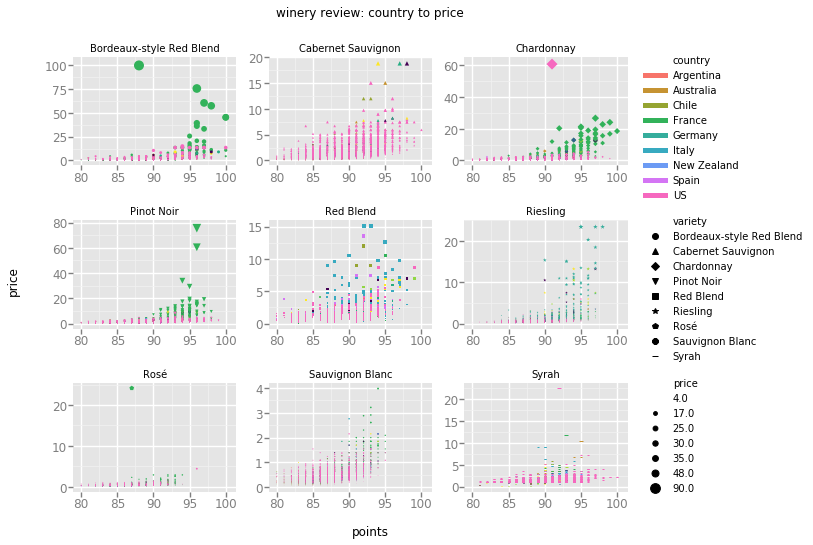

<ggplot: (-9223372029302193257)>

In [23]:
p = ggplot(df,aes(x="points", y="price", shape ="variety", size ="price", color="country")) + geom_point()
p + facet_wrap('variety', scales="free_y") + xlab("points") + ylab("price") + ggtitle("winery review: country to price")

In [ ]:
## from above plots, we can infer that France has the most expensive Birdeaux Red Blend 

In [11]:
## Create a Correlation Heatmap in Seaborn using a public dataset.

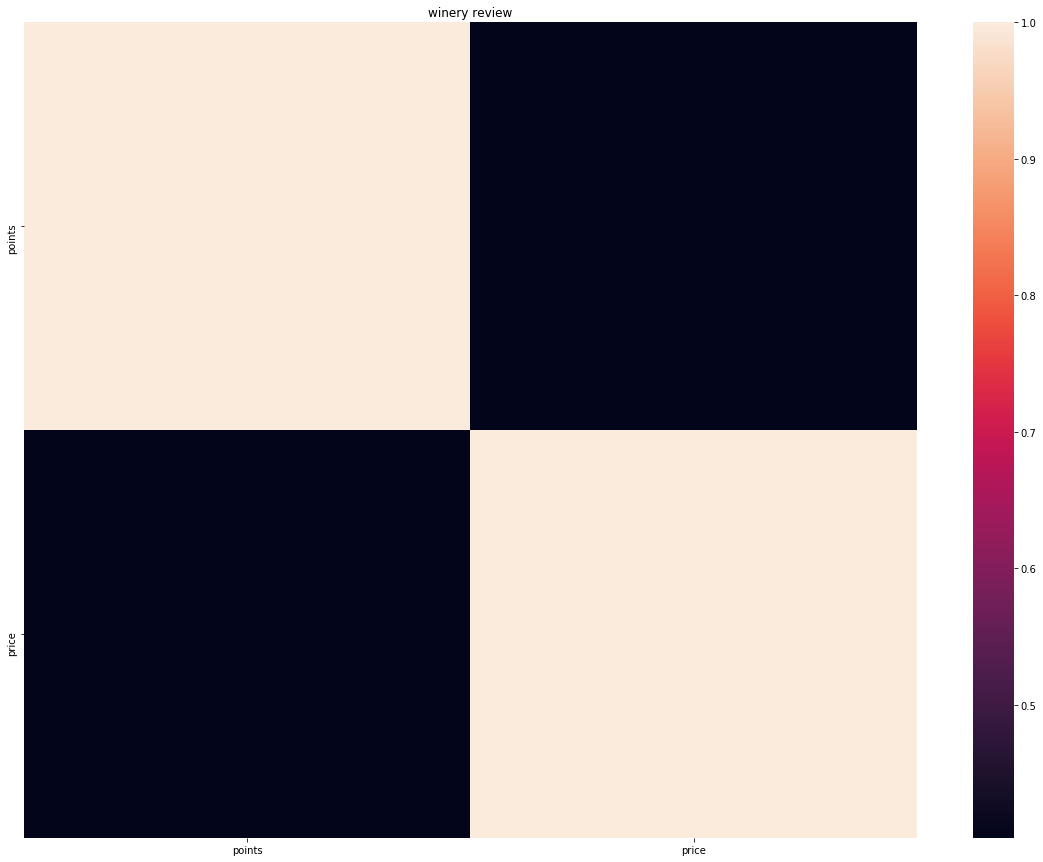

In [14]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("winery review")
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [21]:
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=0,
                                                    stratify=y)
